# Show distributions of modified Rankin Scale before stroke

Distributions of mRS (modified Rankin Scale) are shown for:
* All patients
* Patients with NIHSS of 0-10 (surrogate for non large vessel occlusions)
* Patients with NIHSS of 11+ (surrogate for large vessel occlusions)

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Change default colour scheme:
plt.style.use('seaborn-colorblind')

# import data
data = pd.read_csv(
    './../data/2019-11-04-HQIP303-Exeter_MA.csv', low_memory=False)

## Get distribution of mRS before stroke for all patients

In [2]:
count, division = np.histogram(data['S2RankinBeforeStroke'], bins=range(0,7))

results_all = pd.DataFrame()#df.index.name
results_all.index.name='mRS'
results_all['count'] = count
results_all['fraction'] = count / count.sum()
results_all

,count,fraction
mRS,,
0,131489,0.533043
1,38556,0.156302
2,26587,0.107781
3,29952,0.121422
4,15684,0.063581
5,4408,0.017870


## Get distribution of mRS before stroke for NIHSS 0-10

NIHSS <11 is used as a surrogate for non large vessel occlusions

In [3]:
mask = data['S2NihssArrival'] < 11

In [4]:
count, division = np.histogram(
    data[mask]['S2RankinBeforeStroke'], bins=range(0,7))

results_nlvo = pd.DataFrame()#df.index.name
results_nlvo.index.name='mRS'
results_nlvo['count'] = count
results_nlvo['fraction'] = count / count.sum()
results_nlvo

,count,fraction
mRS,,
0,99626,0.582881
1,27781,0.162538
2,17680,0.103440
3,17472,0.102223
4,7174,0.041973
5,1187,0.006945


## Get distribution of mRS before stroke for NIHSS 11+

NIHSS 11+ is used as a surrogate for non large vessel occlusions

In [5]:
mask = data['S2NihssArrival'] > 10

In [6]:
count, division = np.histogram(
    data[mask]['S2RankinBeforeStroke'], bins=range(0,7))

results_lvo = pd.DataFrame()#df.index.name
results_lvo.index.name='mRS'
results_lvo['count'] = count
results_lvo['fraction'] = count / count.sum()
results_lvo

,count,fraction
mRS,,
0,23970,0.417894
1,8200,0.142959
2,6793,0.118430
3,9419,0.164211
4,6526,0.113775
5,2451,0.042731


## Plot results

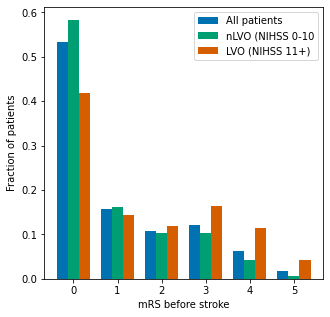

In [7]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
width = 0.25
x = results_all.index
ax.bar(x - width, results_all['fraction'], width, label='All patients')
ax.bar(x, results_nlvo['fraction'], width, label='nLVO (NIHSS 0-10')
ax.bar(x + width, results_lvo['fraction'], width, label='LVO (NIHSS 11+)')
ax.set_ylabel('Fraction of patients')
ax.set_xlabel('mRS before stroke')
ax.legend()
plt.savefig('./output/mrs_before_stroke.jpg', dpi=300)
plt.show()